In [ ]:
import numpy as np
np.random.seed(42)
x_train = np.random.uniform(-10, 10, (1000, 1)).astype(np.float32)
y_train = (2 * x_train + np.random.normal(0, np.abs(x_train) + 1, (1000, 1))).astype(np.float32)
import os
import jax 
print(F'jax.__version__    : {jax.__version__}')
os.environ["KERAS_BACKEND"] = "jax" # set backend before importing keras 

import numpyro
print(F'numpyro.__version__: {numpyro.__version__}')

import keras
print(F'keras.__version__  : {keras.__version__}')
import jax.numpy as jnp
from jax import random
import time

jax.__version__    : 0.4.26
numpyro.__version__: 0.15.3
keras.__version__  : 3.6.0


## We use numpyro which goes well with JAX

For torch you could use torch.distributions. 

In [23]:
from numpyro import distributions as dist   # Distributions

In [24]:
p = 0.1
dist_my = dist.Bernoulli(probs=p) # Define a Bernoulli distribution with p=0.1

In [25]:
dist_my.mean, dist_my.variance, p*(1-p) # Check the mean and variance of the distribution

(0.1, 0.09000000000000001, 0.09000000000000001)

In [36]:
dist_my.log_prob(1), dist_my.log_prob(0) # Check the log probability of the distribution
# (log(0.1), log(0.9))
# dist_my.prob(0.1) only works in log space

(Array(-2.3025851, dtype=float32), Array(-0.10536052, dtype=float32))

In [37]:
dist_my.sample(random.PRNGKey(0), (10,)) # Sample 100 values from the distribution
# A speciality in numpyro is that we need to pass the random key to the sample method

Array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

## Continous Data
### The Normal distribution
The normal distribution samples a single value from a Gaussian

In [43]:
dist_my2 = dist.Normal(loc=1,scale=2)
print(dist_my2.mean, dist_my2.variance)
print(dist_my2.log_prob(1), dist_my2.log_prob(0))

1 4
-1.6120857 -1.7370857


# Count Data

2.3
2.3


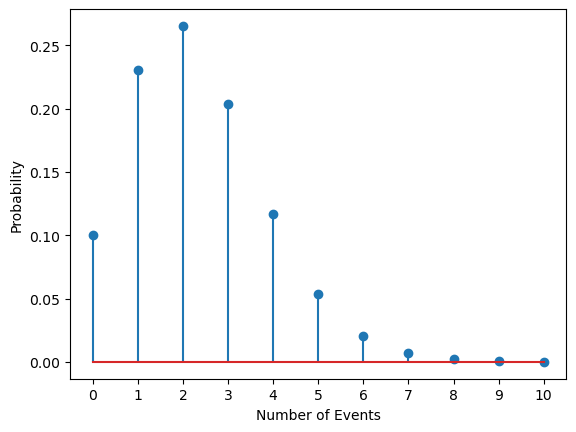

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')

dist_my = dist.Poisson(rate = 2.3) #A
vals = np.linspace(0,10,11) #B
p = dist_my.log_prob(vals) #C
print(dist_my.mean)  #D
print(dist_my.variance)   #E

plt.xticks(vals)
plt.stem(vals, np.exp(p))
plt.xlabel('Number of Events')
plt.ylabel('Probability')
plt.show()

#A Poisson distribution with parameter rate = 2.3
#B Integer values from 0 to 10 for the x-axis 
#C Computes the probability for the values
#D The mean value yielding 2.3
#E The standard deviation yielding 2.3